In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [36]:
df.shape

(1090, 9)

In [37]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    2
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1090 non-null   float64
 1   TM      1090 non-null   float64
 2   Tm      1090 non-null   float64
 3   SLP     1090 non-null   float64
 4   H       1090 non-null   float64
 5   VV      1090 non-null   float64
 6   V       1090 non-null   float64
 7   VM      1090 non-null   float64
 8   PM 2.5  1088 non-null   float64
dtypes: float64(9)
memory usage: 76.8 KB


<AxesSubplot:>

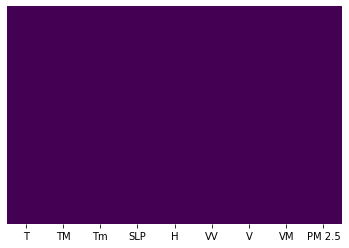

In [50]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
df=df.dropna()

In [41]:
df.drop(df[df['VM']=='-'].index,inplace=True)

In [42]:
df.shape

(1088, 9)

In [43]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [44]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [45]:
y.head()

0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

In [12]:
X.VM

0        9.4
1       11.1
2       11.1
3       20.6
4       22.2
        ... 
1084     3.5
1085     3.5
1086    25.9
1087     9.4
1088     5.4
Name: VM, Length: 1088, dtype: float64

In [46]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.963416,0.957227,-0.883207,-0.488919,0.625547,0.320218,0.276548,-0.629693
TM,0.963416,1.000000,0.889979,-0.826008,-0.576799,0.598727,0.303218,0.285671,-0.565459
Tm,0.957227,0.889979,1.000000,-0.912333,-0.275047,0.547490,0.312165,0.244408,-0.661733
SLP,-0.883207,-0.826008,-0.912333,1.000000,0.231971,-0.483494,-0.325862,-0.269129,0.605637
H,-0.488919,-0.576799,-0.275047,0.231971,1.000000,-0.489597,-0.356241,-0.368694,0.166577
VV,0.625547,0.598727,0.547490,-0.483494,-0.489597,1.000000,0.369851,0.325963,-0.593327
V,0.320218,0.303218,0.312165,-0.325862,-0.356241,0.369851,1.000000,0.780952,-0.327917
VM,0.276548,0.285671,0.244408,-0.269129,-0.368694,0.325963,0.780952,1.000000,-0.262848
PM 2.5,-0.629693,-0.565459,-0.661733,0.605637,0.166577,-0.593327,-0.327917,-0.262848,1.000000


Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')


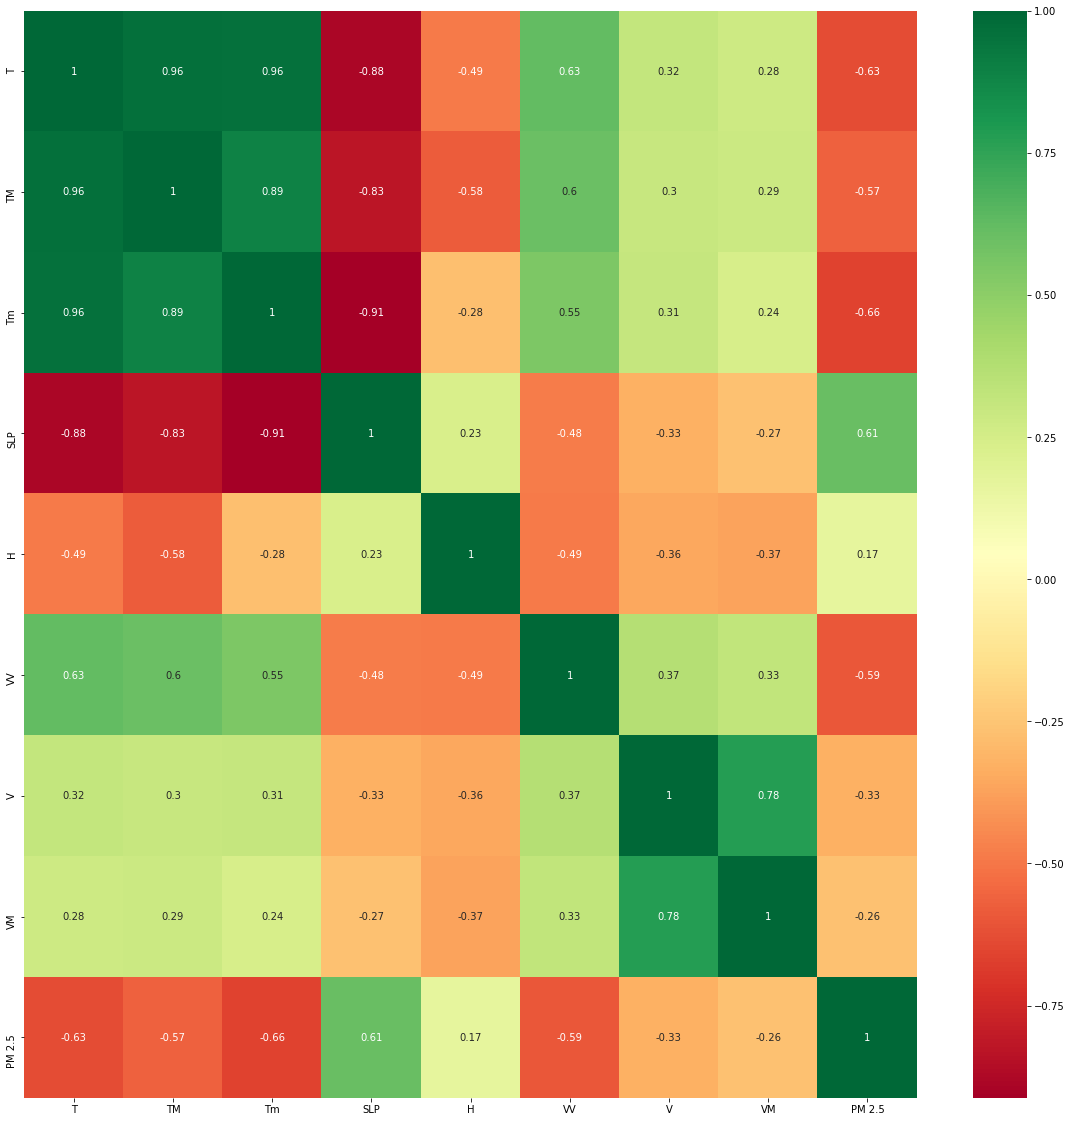

In [48]:
import seaborn as sns
corrmat=df.corr()
top_corr_features=corrmat.index
print(top_corr_features)
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

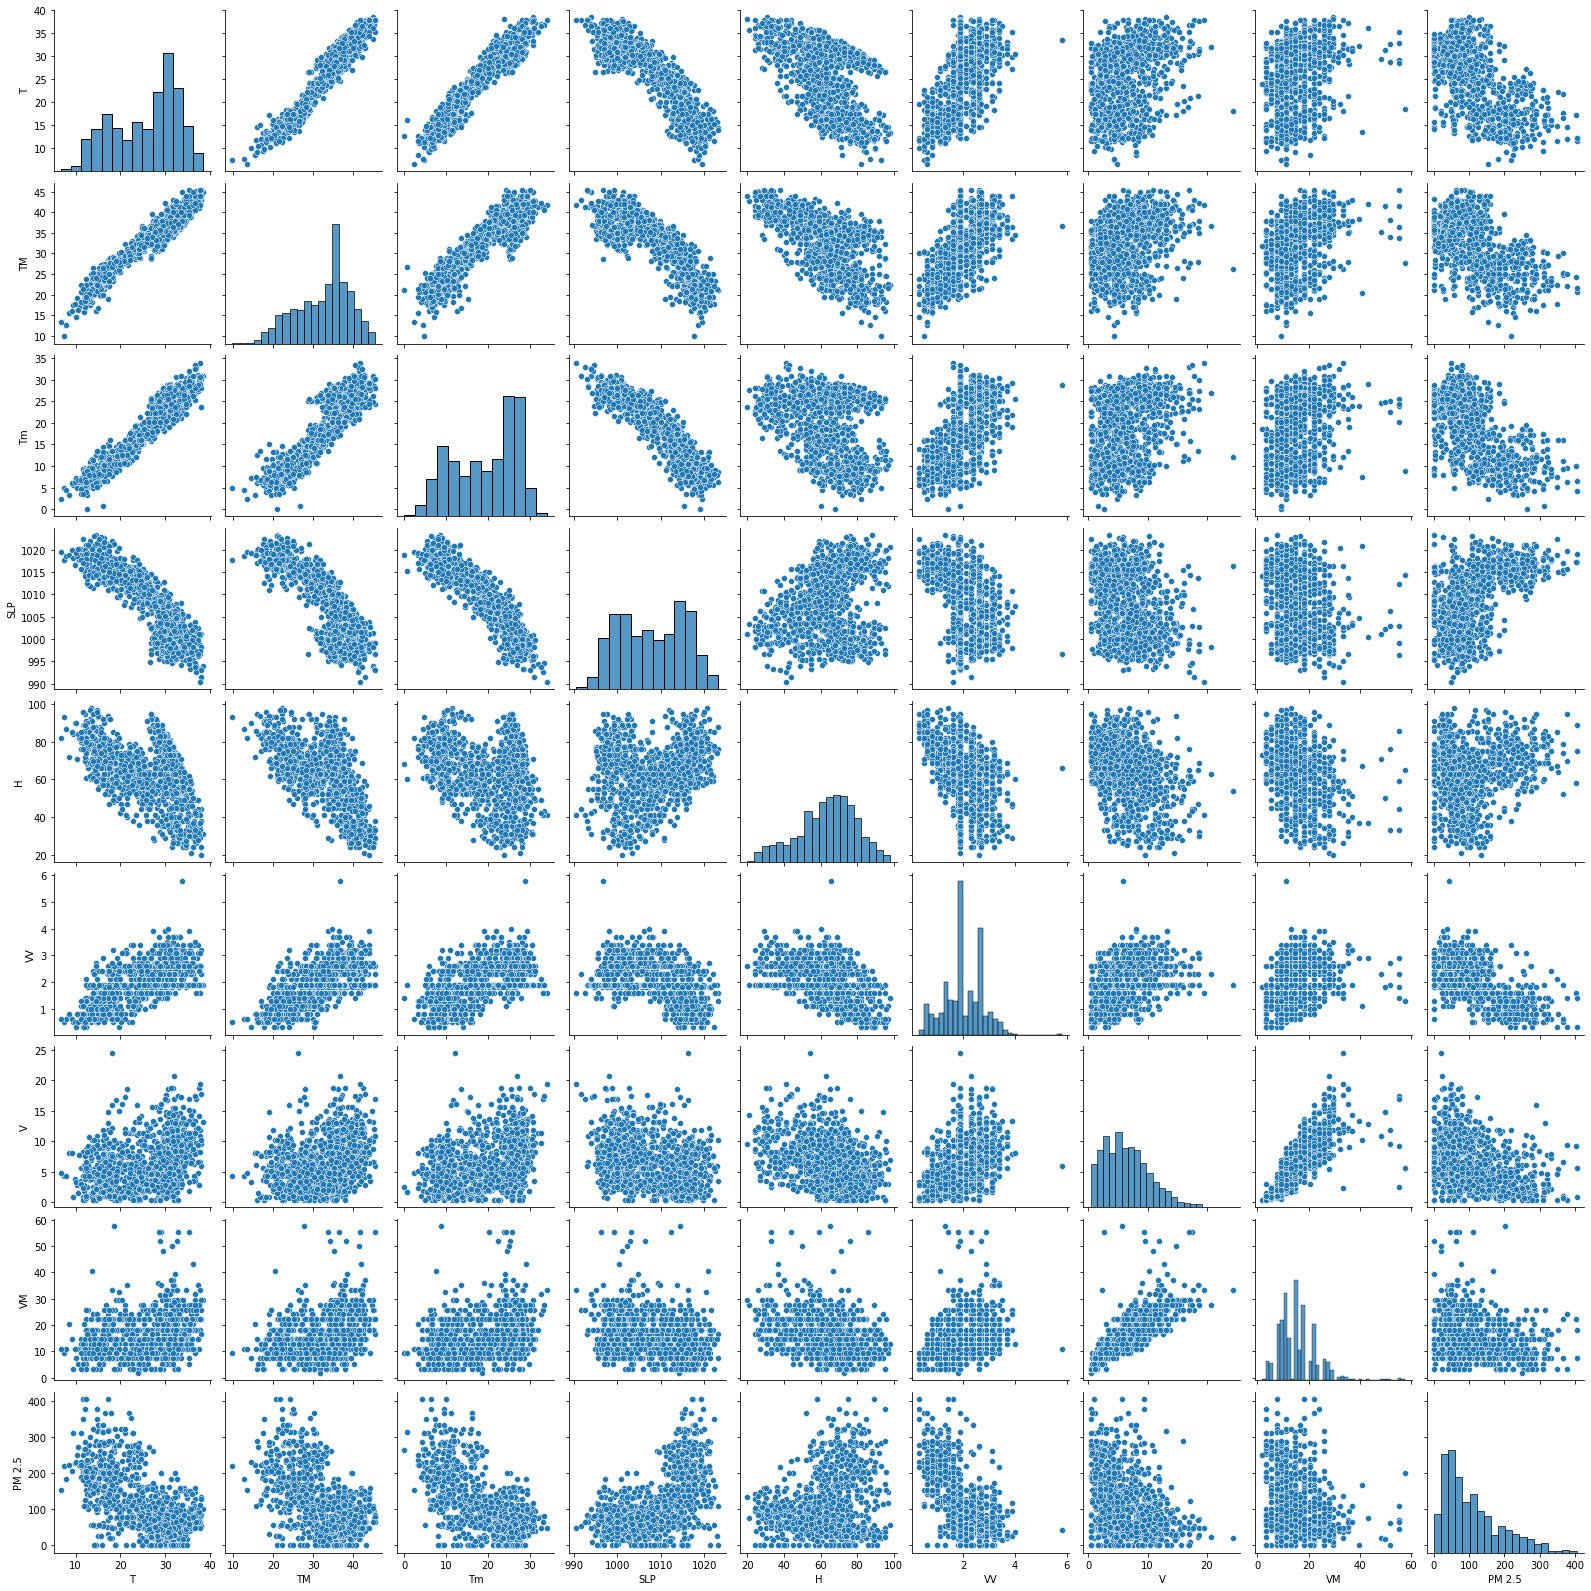

In [51]:
sns.pairplot(df)

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [16]:
print(model.feature_importances_)

[0.15856563 0.11123748 0.20232324 0.14809336 0.07525014 0.19700549
 0.06391662 0.04360803]


In [99]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


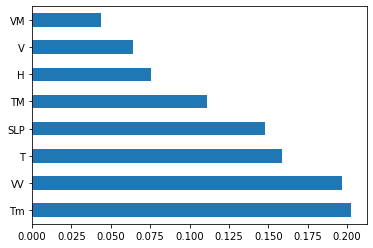

In [53]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

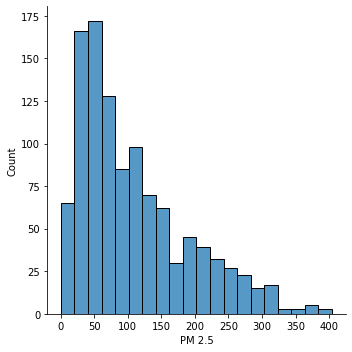

In [54]:
sns.displot(y)

### Train-Test-Split

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [58]:
print("Coefficient of determination R^2 <--on train set:{}".format(regressor.score(X_train,y_train)))

Coefficient of determination R^2 <--on train set:0.5558460401426301


In [59]:
print("Coefficient of determination R^2 <--on test set:{}".format(regressor.score(X_test,y_test)))

Coefficient of determination R^2 <--on test set:0.5002132050072752


In [60]:
regressor.score(X_test,y_test)

0.5002132050072752

In [68]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
score

array([0.57167602, 0.53819461, 0.49430299, 0.43619185, 0.44066312])

In [69]:
score.mean()

0.4962057187240264

### Model Evaluation

In [24]:
coeff_df=pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,0.735866
TM,0.494222
Tm,-5.785464
SLP,0.530084
H,-0.734590
VV,-43.457359
V,-1.929977
VM,0.089839


### Interpreting the coefficients:
- Holding all the other feature fixed, a 1 unit increase in T is associated with an increase of 0.73 in AQI PM 2.5
- Holding all the other feature fixed, a 1 unit increase in TM is associated with an increase of 0.49 in AQI PM 2.5
- Holding all the other feature fixed, a 1 unit increase in Tm is associated with a decrease of 5.78 in AQI PM 2.5
- Holding all the other feature fixed, a 1 unit increase in SLP is associated with an increase of 0.53 in AQI PM 2.5
- Holding all the other feature fixed, a 1 unit increase in H is associated with a decrease of 0.73 in AQI PM 2.5
- Holding all the other feature fixed, a 1 unit increase in VV is associated with a decrease of 43 in AQI PM 2.5

In [25]:
regressor.coef_

array([  0.73586574,   0.49422152,  -5.78546447,   0.53008447,
        -0.7345896 , -43.45735865,  -1.92997688,   0.08983924])

In [26]:
regressor.intercept_

-201.8468700859104

In [27]:
prediction=regressor.predict(X_test)

In [71]:
y_test-prediction

709    75.045929
938    58.072959
693    10.904383
304   -23.745431
781   -15.054085
         ...    
9     -95.116435
444   -25.517504
842    -0.791382
739    81.131506
531    68.192788
Name: PM 2.5, Length: 327, dtype: float64

<AxesSubplot:xlabel='PM 2.5', ylabel='Count'>

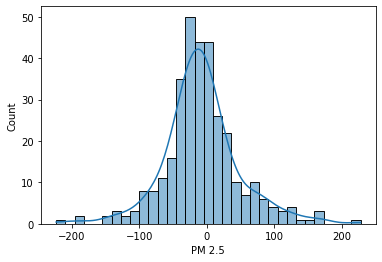

In [76]:
sns.histplot(y_test-prediction,kde=True)

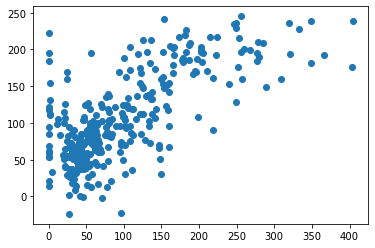

In [77]:
plt.scatter(y_test,prediction)

In [30]:
import pickle

In [31]:
file=open('regression_model.pkl','wb')

pickle.dump(regressor,file)


In [78]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 40.5424653113252
MSE: 3226.014432469146
RMSE: 56.79801433561869
